<a href="https://colab.research.google.com/github/Shriharsh-Deshmukh/100-Days-100-Models/blob/main/(Pr_4)iris_LDA_%26_QDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import libraries**

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

## **Load Dataset**

In [2]:

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## **Data preprocessing**

In [3]:
X = df.drop('target', axis=1)
y = df['target']

## **Standardize the features**

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Split Data**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# **Training Models**

### **Training Linear Discriminant Analysis (LDA) model**

In [6]:

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

### **Training Quadratic Discriminant Analysis (QDA) model**

In [7]:

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# **Evaluation metrics**

In [8]:

print("LDA Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

print("\nQDA Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Classification Report:\n", classification_report(y_test, y_pred_qda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))

LDA Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

QDA Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# **Visualizations**

In [21]:

def plot_decision_boundaries(model, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Pastel1)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend(*scatter.legend_elements(), title="Classes")

In [22]:
datasets = [
    (np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 500),
     np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 500)),
    (np.random.multivariate_normal([0, 0], [[2, 0], [0, 0.5]], 500),
     np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 2]], 500)),
    (np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 500),
     np.random.multivariate_normal([2, 2], [[0.5, -0.2], [-0.2, 0.5]], 500))
]

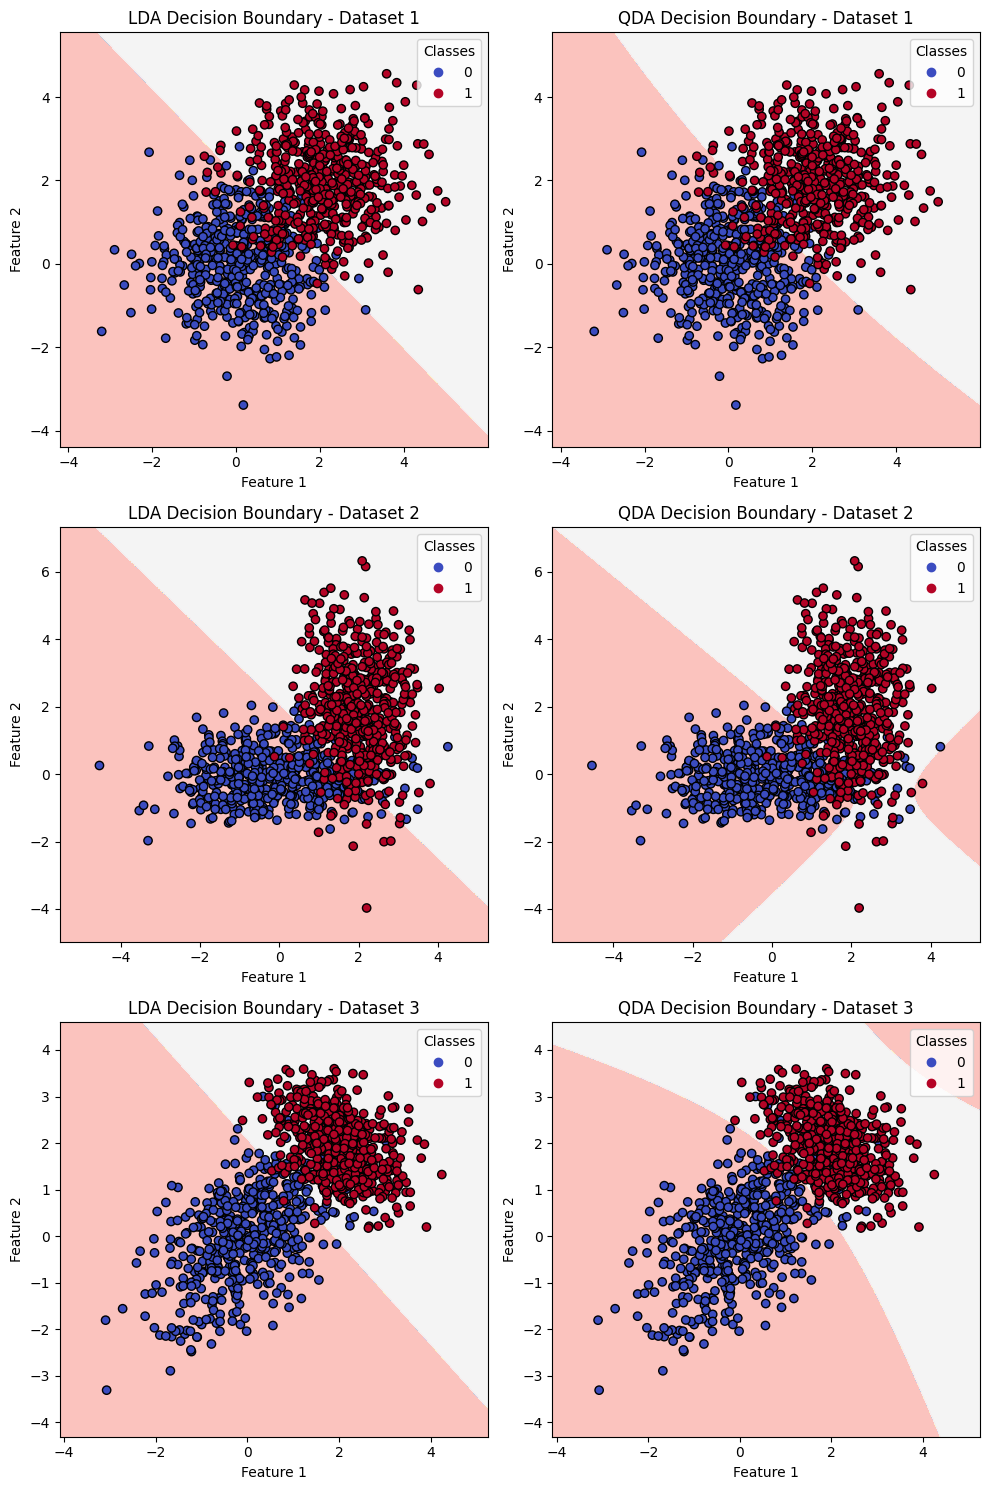

In [24]:
# Plot decision boundaries for LDA and QDA using synthetic data
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
for i, (X1, X2) in enumerate(datasets):
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(X1.shape[0]), np.ones(X2.shape[0])))
    # Train LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    plot_decision_boundaries(lda, X, y, f"LDA Decision Boundary - Dataset {i+1}", axes[i, 0])

    # Train QDA
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    plot_decision_boundaries(qda, X, y, f"QDA Decision Boundary - Dataset {i+1}", axes[i, 1])

plt.tight_layout()
plt.show()